In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

In [ ]:
dfx = pd.read_csv('lregre.csv')
x = dfx.values[:,0]
y = dfx.values[:,1]
x = x.reshape(-1,1)
y = y.reshape(-1,1)

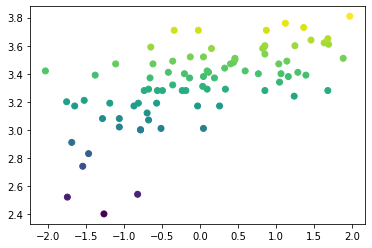

In [ ]:
X = (x - x.mean())/x.std()

Y = y

plt.scatter(X,Y,c=Y)
plt.show()

#This step normalises the data 

In [ ]:
def h_theta(x, theta):
    return theta[0] + theta[1]*x

def error(X,Y, theta):
    m = X.shape[0]
    error = 0
    for i in range(m):
        hx = h_theta(X[i], theta)
        error += (hx - Y[i])**2
    
    return error

def gradient(X, Y, theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]
    
    for i in range(m):
        hx = h_theta(X[i],theta)
        grad[0] += (hx - Y[i])
        grad[1] += (hx - Y[i])*X[i]

    return grad

def batch_gradient(X,Y,theta,batch_size = 1):
    m = Y.shape[0]
    indices = np.arrange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((2,))
    for i in indices:
        h  = hypothesis(X[i],theta)
        grad[0] += (Y[i] - h)
        grad[1] += (Y[i] - h)*X[i]
    return grad*0.5

def gradientDescent(X, Y, learning_rate = 0.001):
    theta = np.zeros((2, ))
    itr = 0
    max_itr = 100
    error_list = []
    
    
    while(itr<=max_itr):
        
        grad = gradient(X,Y, theta)
        e = error(X, Y, theta)
        
        error_list.append(e)
        
        theta[0] -= learning_rate*grad[0]
        
        theta[1] -= learning_rate*grad[1]
        itr +=1
        
    return theta, error_list

In [ ]:
final_theta, error_lst = gradientDescent(X,Y)

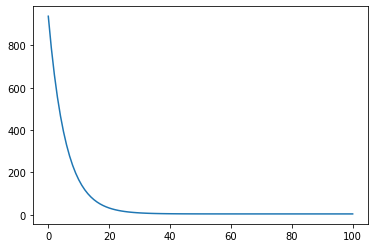

In [ ]:
plt.plot(error_lst)

In [ ]:
print(final_theta)

[3.32976612 0.17201252]


In [ ]:
xtest = np.linspace(-2,2,10)
#This gives us 10 equidistant points between -2 and 2 
print(xtest)

[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]


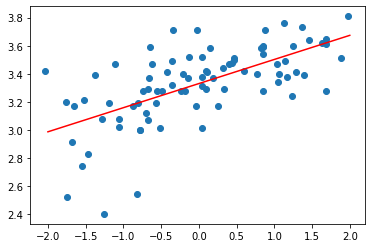

In [ ]:
plt.scatter(X,Y)
plt.plot(xtest,h_theta(xtest,final_theta), color = 'red')
plt.show()